<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 HW10 </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due December 6, 2024 </b> </font></h1>
    
</div>
</center>

<br>



<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Fall 2024
</font>
</center>








## Your Name: Vince Verdugo

## Your ID: 826107601

## 1. Summary

Question 1: I used symbolic computing to obtain a solution to the Logistic equation. I then plotted my solution. 

Question 2: I solved for the Logistic equation in Q1 using the Euler scheme for different values of $\sigma \Delta t$. I then generated a multi-panel plot for each value of $\sigma \Delta t$ in the $t-X$ space.

Question 3: Given the array operation $b = 3*a+1$, I implemented the operation using three different methods. I then used the given code to incorporate CuPy, which I ran in Google Colab.

Question 4: With the given code, I reviewed the code and discussed how the differnent matrices were constructed and the impact of weights on cosine similarity values. 

## 2. Methodology

For question 1, I used different sympy methods such as <code>symbols</code>, <code>Function</code>, <code>Eq</code>, <code>Derivative</code>, and <code>dsolve</code> to find the symbolic solution to the differential equation. I used another sympy method <code>lambdify</code>, as well as <code>np.arange</code> to define X and t to plot the solution. I also used <code>rhs.subs()</code> to substitute the value $\sigma = 1$ into the derived solution.

For question 2, I used numpy methods <code>arange</code> and <code>zeros</code> to define X and t. I created a list of values of $\sigma \Delta t$. I declared two empty lists <code>Xvals, tVals</code>
that I used to store my numpy arrays of my approximation values. I used a for loop to iterate over the values of ``sigt``, and implememted the Euler scheme to calculate the functions of X. I also used matplotlib.pyplot methods to plot a multi-plane plot containg each value of ``sigdt``.

For question 3, to perform $b = 3*a+1$ with Python lists I used a for loop to iterate over each value of ``a`` and perform the operation. When using Numpy arrays, I applied both multiplication and addition to ``a`` by assigning a new array ``b = 3*a*+1`` and also using in place arithmetic <code>a *= 3, a += 1</code>

For question 4, I used markdown to discuss the provided code.

## 3. Code and Results (e.g., Tables, Figures, Outputs)

### Results for Question 1

#### 1a

In [1]:
#Import packages
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

#Define function X, dependent variable t, and constant sigma
t, sigma = sp.symbols('t, sigma')
X = sp.Function('X')

#Define (1) 
eq1 = sp.Eq(sp.Derivative(X(t), t), sigma*X(t)*(1-X(t)))
#Use dsolve to obtain solution
sol1 = sp.dsolve(eq1, X(t), ics = {X(0): 0.001}) #Define intitial condition X(0)=0.001

display(sol1)

Eq(X(t), 1/(1 + 999.0*exp(-sigma*t)))

#### 1b

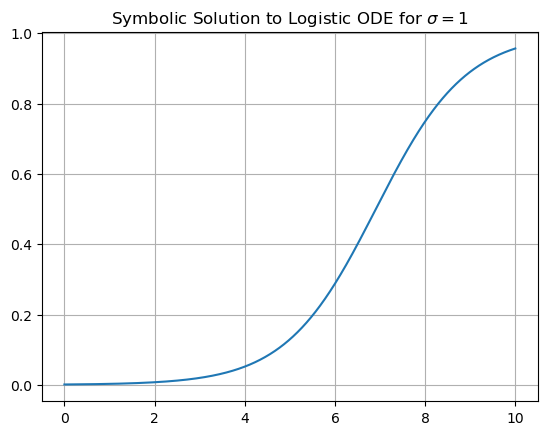

In [2]:
#Substitute sigma = 1
Xnew = sol1.rhs.subs({sigma: 1})

#Lambdify X
lam_X = sp.lambdify(t, Xnew, modules=['numpy'])

#Define numerical values of t and X (lam_X)
dt = 0.01
tnum = np.arange(0,10+dt,dt)
Xnum = lam_X(tnum)

#Plot data
plt.plot(tnum, Xnum)
plt.title(r'Symbolic Solution to Logistic ODE for $\sigma = 1$')
plt.grid()
plt.show()

### Results for Question 2

#### 2a

Using Euler we will redefine Eq.(1) as 

$$X_{n+1} = X_n + \sigma \Delta tX_n(1-X_n)$$

Using $\sigma \Delta t = 1.8, 2.0, 2.5, 3.5, 3.8, 4$ and $t \in [0,40]$

In [3]:
#Define initial conditions and parameters
X0 = 0.1
sigdt = [1.8, 2.0, 2.5, 3.5, 3.8, 4.0]

#For iteration
Xvals = []
tVals = []

#Define X and t using different values of sigdt
for i in sigdt:
    t = np.arange(0, 40+i, i)
    X = np.zeros(len(t))
    X[0] = X0
    #Euler method calculation
    for n in range(0,len(X)-1):
        X[n+1] = X[n] + i*X[n]*(1-X[n])
    #Add t-X values to iteration lists
    Xvals.append(X)
    tVals.append(t)

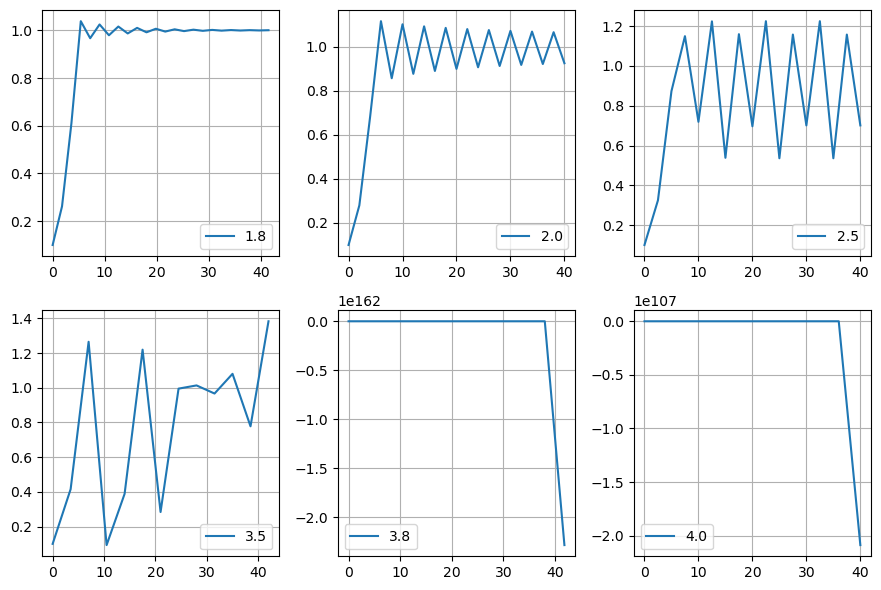

In [17]:
plt.figure(figsize=(9,6))
#Iterate
for i in range(0, len(Xvals)):
    plt.subplot(2,3,i+1)
    plt.plot(tVals[i], Xvals[i], label=f'{sigdt[i]}')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

### Results for Question 3

Using a = [1,..,10]

In [5]:
#Using Python lists
a = [1,2,3,4,5,6,7,8,9,10]
b = []

#Loop over each element of a
for i in range(0,len(a)):
    b.append(3*a[i]+1)
print(b)

[4, 7, 10, 13, 16, 19, 22, 25, 28, 31]


In [6]:
#Using numpy arrays
a = np.arange(1,11)
#Define b applying operations to a
b = 3*a+1

print(b)

[ 4  7 10 13 16 19 22 25 28 31]


In [7]:
#Using in place arithemetic on numpy arrays
a = np.arange(1,11)
a *= 3
a += 1

print(a)

[ 4  7 10 13 16 19 22 25 28 31]


#### 3a

In [8]:
#pip install tabulate
#import numpy as np
import time
from tabulate import tabulate  # Import tabulate to format the output into a table

# Function to compute the time taken for each method
def compute_time(array_size):
    # Create a large array using Python lists
    a_list = list(range(array_size))

    # Create a large array using NumPy
    a_numpy = np.arange(array_size)

    # Using loop to compute b = 3 * a + 1
    start_time = time.time()
    b_loop = []
    for element in a_list:
        b_loop.append(3 * element + 1)
    loop_time = time.time() - start_time

    # Using NumPy arrays to compute b = 3 * a + 1
    start_time = time.time()
    b_numpy = 3 * a_numpy + 1
    numpy_time = time.time() - start_time

    # Using in-place arithmetic to compute b = 3 * a + 1
    start_time = time.time()
    a_numpy *= 3
    a_numpy += 1
    inplace_time = time.time() - start_time

    return [array_size, loop_time, numpy_time, inplace_time]

# Table headers
headers = ["Array Size", "Time using Loop", "Time using NumPy", "Time using In-place Arithmetic"]

# Array sizes to test
array_sizes = [10**6, 10**7]

# Generate the table
table_data = []
for size in array_sizes:
    table_data.append(compute_time(size))

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------+-------------------+--------------------+----------------------------------+
|   Array Size |   Time using Loop |   Time using NumPy |   Time using In-place Arithmetic |
+==============+===================+====================+==================================+
|      1000000 |          0.090317 |          0.013109  |                        0.0017271 |
+--------------+-------------------+--------------------+----------------------------------+
|     10000000 |          0.779578 |          0.0851929 |                        0.0153801 |
+--------------+-------------------+--------------------+----------------------------------+


#### 3b

In [10]:
"""Ran in Colab"""
# #Adapt code to incorporate CuPy
# !pip install cupy
# import cupy as cp
# import time
# from tabulate import tabulate  # Import tabulate to format the output into a table

# # Function to compute the time taken for each method
# def compute_time(array_size):
#     # Create a large array using Python lists
#     a_list = list(range(array_size))

#     # Create a large array using NumPy
#     a_cupy = cp.arange(array_size)

#     loop_time = -9999
    
#     # Using NumPy arrays to compute b = 3 * a + 1
#     start_time = time.time()
#     b_cupy = 3 * a_cupy + 1
#     cupy_time = time.time() - start_time

#     # Using in-place arithmetic to compute b = 3 * a + 1
#     start_time = time.time()
#     a_cupy *= 3
#     a_cupy += 1
#     inplace_time = time.time() - start_time

#     return [array_size, loop_time, numpy_time, inplace_time]

# # Table headers
# headers = ["Array Size", "Time using Loop", "Time using NumPy", "Time using In-place Arithmetic"]

# # Array sizes to test
# array_sizes = [10**6, 10**7]

# # Generate the table
# table_data = []
# for size in array_sizes:
#     table_data.append(compute_time(size))

# # Print the table
# print(tabulate(table_data, headers=headers, tablefmt="grid"))

'Ran in Colab'

### Results for Question 4

#### 4a

In the given code, the matrix $V$ is the normalization of the RGB vector. $Q$ and $K$ are constructed by using the <code>@</code> matrix multiplication operator between the <code>warm_weight_matrix</code> and V.

#### 4b

The original similarity matrix is calculated by calling the <code>cosine_similarity</code> function on the vectors function. This function calculates and returns the cosine similarity for each color vector to 3 decimal places. The $QK^T$ matrix is calculated by taking the dot product of the matrix $Q$ and the transpose of $K$. The attention scores matrix is calculated by applying the <code>softmax</code> function on the <code>scaled_similarity_matrix</code>, which is calculated by 

<code>d_k = Q.shape[1]
scaled_similarity_matrix = similarity_matrix / np.sqrt(d_k)
</code>

The weighted sum matrix is found by taking the dot product of <code>attention_scores</code> and <code>V</code>

#### 4c

Upon looking at the second graph, we can see that by emphasizing warm colors in the Q and K matrices, the cosine similarities of the warm-cool values are almost zero. That being said, the cosine similarity of the warm-warm values range from 2.25 to 4.50. We see that the range of cosine similarity values expands from [0,1] to [0,4.5]. 